   ## РАЗРАБОТКА РЕКОМЕНДАЦИЙ ДЛЯ СЕТИ ФИТНЕС-ЦЕНТРОВ ДЛЯ ПОВЫШЕНИЯ КАЧЕСТВА ВЗАИМОДЕЙСТВИЯ С КЛИЕНТАМИ 

  <b>  Цель исследования: посредством применения методов классификации и кластеризации определить основные значимые
факторы, влияющие на удержание и отток клиентов фитнес-центра, а также выдать рекомендации для повышения эффективности бизнес-
модели, обеспечивающей сохранение клиентов и, соответственно, повышение доходности бизнеса. </b>

## ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Исследовательский анализ данных](#set)
2. [Распределение средних значений влияющих факторов между группами выбывших и оставшихся клиентов](#set1)
3. [Гистограммы распределения влияющих факторов для выбывших и оставшихся клиентов ](#set2)  
4. [Построение матрицы корреляции признаков](#set3)
5. [Построение модели классификации для прогноза оттока клиентов](#set4)
6. [Построение модели иерархической кластеризации признаков](#set5)
7. [Построение модели кластеризации признаков KMeans](#set6)
8. [Сравнительные гистограммы распределения признаков в различных кластерах KMeans](#set7)
9. [Сравнение доли оттока клиентов в разных кластерах](#set8)
10. [Выводы и рекомендации](#set9)

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [40]:
df = pd.read_csv('/datasets/gym_churn.csv')

<div class="alert alert-info">
  Проверена работоспособность ячеек с использованием Kernel - Restart and Run All
</div>

In [41]:
df[:5]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<div class="alert alert-info">
  <b> Исследовательский анализ данных </b>
    <a id="set"></a> 
</div>

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [43]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-info">
   DataFrame с данными не содержит пропусков, все типы данных установлены верно: бинарные категориальные признаки имеют
тип int64, а числовые признаки - тип float64. 
   По результатам исследования данных в столбцах обнаружены следующие факты: средний и медианный возрасты клиентов одинаковы и
составляют 29 лет, то есть отсутиствуют выбросы из слишком молодых и слишком пожилых клиентов (разброс 18 - 41). Мужчины и 
женщины представлены в равных долях. Более 80 % клиентов проживают в ближайшей к центру локации. Ппримерно 50 % клиентов 
являются сотрудниками партнерских компания, а 30 % клиентов воспользовались скидочным промокодом. Больше половины клиентов 
платят помесячно (имеют месячные абонементы) и только меньшая доля клиентов (не менее 25 %) имеют длительные абонементы 
продолжительностью не менее 6 мес. Длительность абонементов распределена неравномерно с большим числом выбросов из длительных
абонементов (более 6 мес), поэтому средняя длительность абонементов (4,68) практически равна std (4,55) и в несколько раз 
больше медианной длительности (1). Групповые занятия посещают около 40 % клиентов. Распределение дополнительных трат клиентов 
имеет относительно равномерный характер без существенных выбросов: средние траты (147) очень близки к медианным (136). 
Распределение времени жизни клиентов также близко к нормальному: средний lifetime (3,72) не намного больше медианного (3,0). 
Средняя частота посещения клиентов фитнес-центра за все время и за последний месяц практически не меняется (около 2 раз/нед). 
Распределение частоты посещения имеет нормальный характер. Отток клиентов из фитнес-центра довольно значительный и составляет 
не менее 25 %. 
</div>

<div class="alert alert-info">
  <b> Распределение средних значений влияющих факторов между группами выбывших и оставшихся клиентов </b>
    <a id="set1"></a> 
</div>

In [44]:
df_s = df.groupby('Churn', as_index = False).agg('mean')

In [45]:
df_s[:5]

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [46]:
def bar_show(f,a):
    plt.figure(figsize=(3, 5))
    sns.barplot(x = 'Churn', y = a, data = f)
    plt.title('Зависимость факта оттока клиентов от параметра {}'.format(a))
    plt.show()

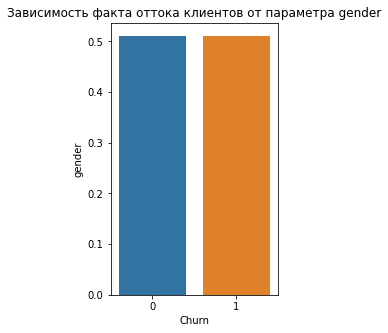

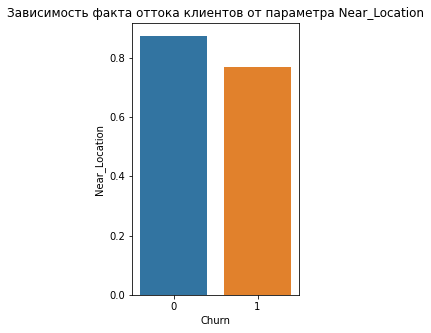

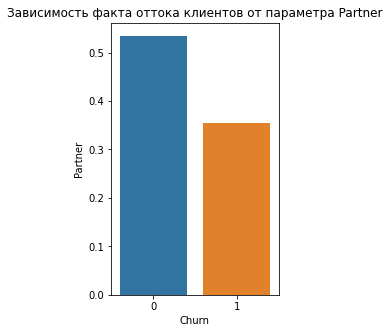

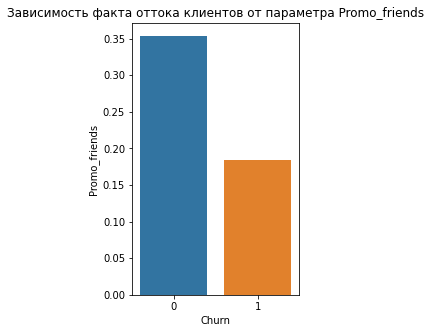

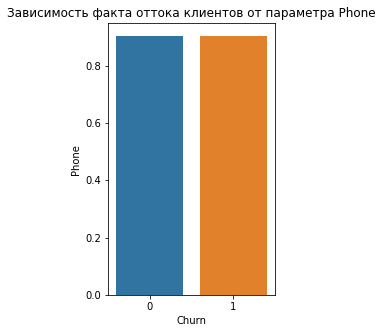

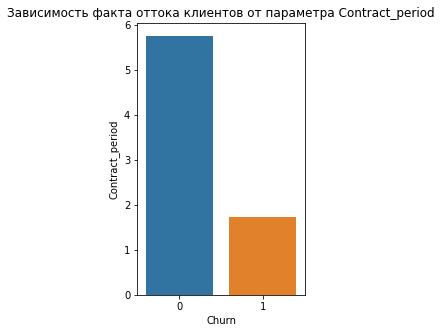

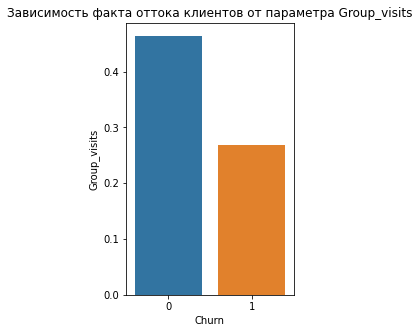

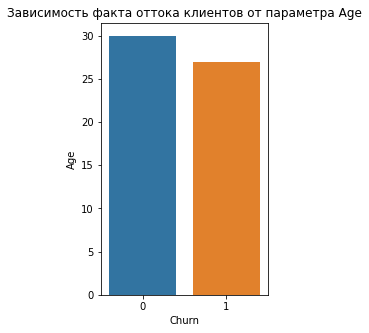

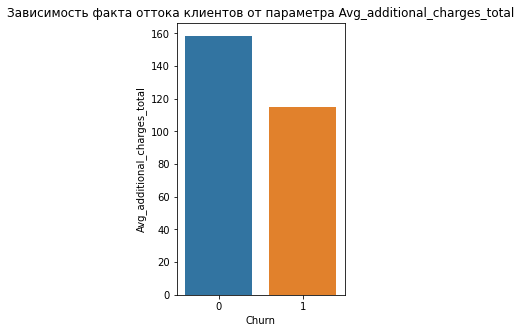

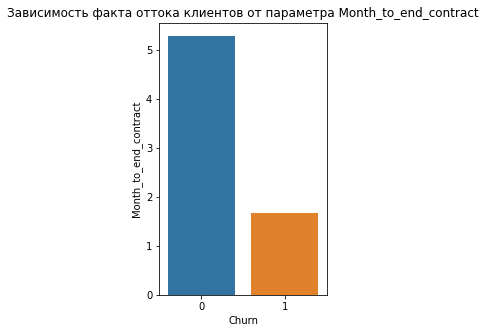

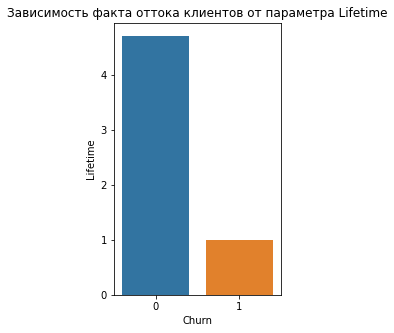

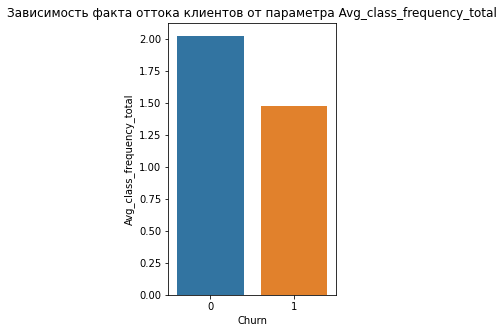

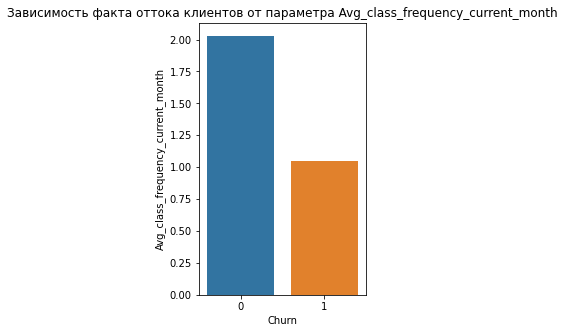

In [47]:
for i in df_s.drop('Churn', axis = 1).columns:
    bar_show(df_s, i)

<div class="alert alert-info">
  Сравнение средних значений влияющих параметров для групп выбывших и оставшихся клиентов показывает, что гендерный состав 
в обоих группах практически одинаков, а выбывшие клиенты немного моложе (средний возраст 27) оставшихся (около 30). Выбышие
клиенты живут немного дальше от фитнес-центра (в локации центра проживают немного менее 80 % выбывших клиентов), по сравнению
с оставшимися клиентамию, около 90 % которых живут в ближайшем районе. Около 35 % выбывших клиентов являлись сотрудниками 
партнерских компаний, в то время, как более 50 % оставшихся клиентов работают у партнеров. Оставшиеся клиенты намного чаще 
пользовались дружесткой промо-акцией (35 %), по сравнению с отпавшими (около 20 %). Соответственно, отвалившиеся клиенты 
имели в 3 раза менее длительные контрактные сроки (в среднем, менее 2 мес), по сравнению с сохраненными (около 6 мес.). 
Групповые занятия посещало в 2 раза меньше выбывших клиентов, по сравнению с оставшимися. Средние траты отвалившихся клиентов 
на доп услуги (120) были на 25 - 30 % ниже, по сравнению с тратами оставшихся (около 160). Логично также, что остаточная
длительность контракта у выбывших клиентов (около 2) почти в 3 раза меньше, чем у сохраненных (около 5,5). Средний срок жизни
отпавших клиентов (1) в 5 раз ниже, по сравнению с оставшимися. Частота посещений фитнеса для выбывших клиентов (1,5) было на 
25 % ниже, по сравнению с оставшимися (2). Интересно, что в последний месяц разница между средними частотами посещения 
существенно увеличилась - сохраненные клиенты посещали фитнес в 2 раза чеще, чем выбывшие.   
</div>

<div class="alert alert-info">
  <b> Гистограммы распределения влияющих факторов для выбывших и оставшихся клиентов </b>
    <a id="set2"></a> 
</div>

In [48]:
def hist_show(f,a):
    plt.figure(figsize=(7, 3))
    sns.histplot(x = a, data = f, hue = 'Churn')
    plt.title('Сравнительная гистограмма распределения фактора {} для выбывших (churn=1) и оставшихся (churn=0) клиентов'.format(a));

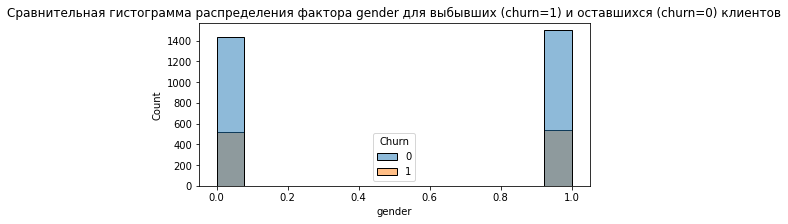

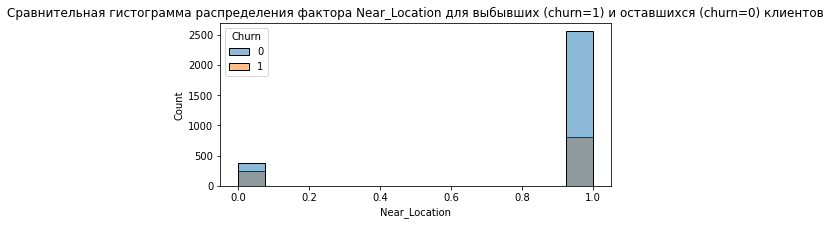

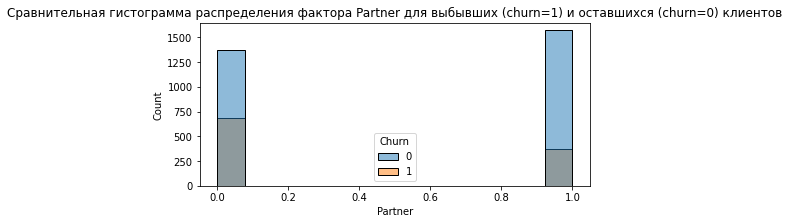

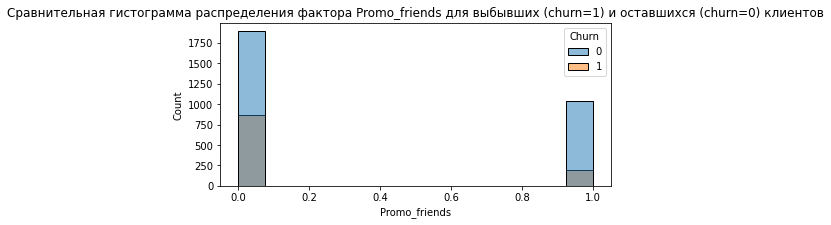

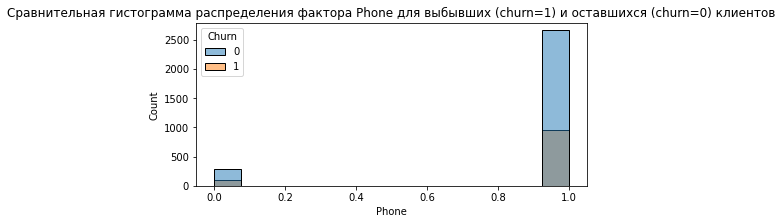

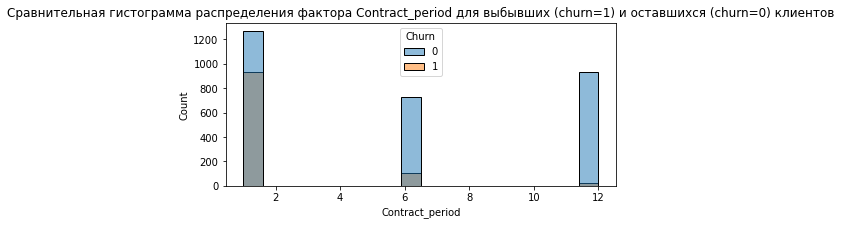

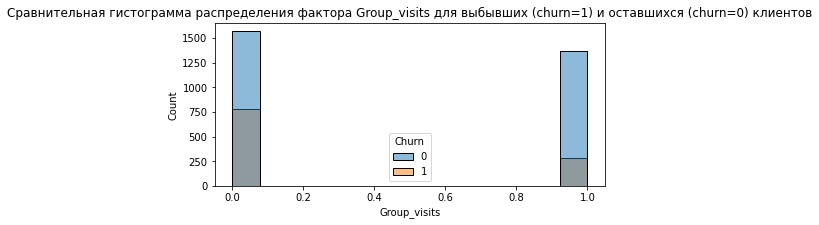

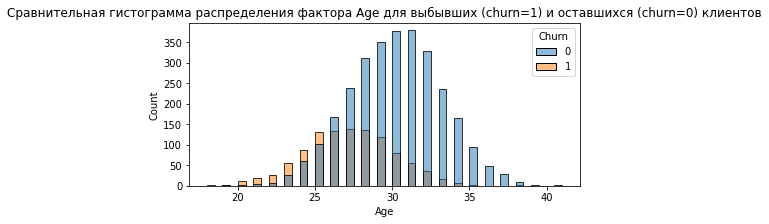

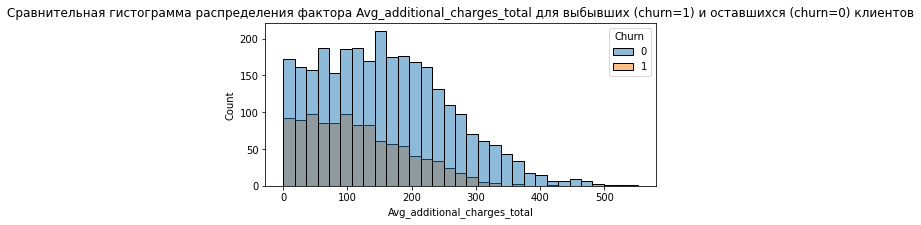

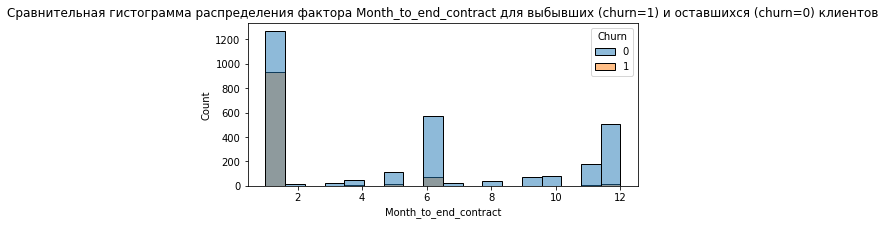

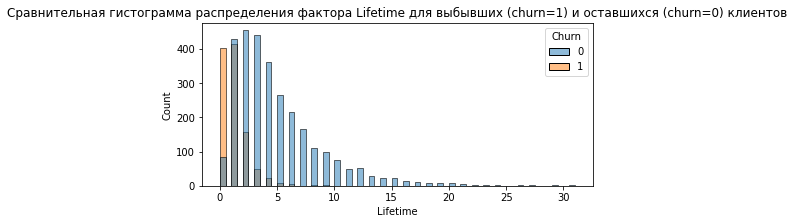

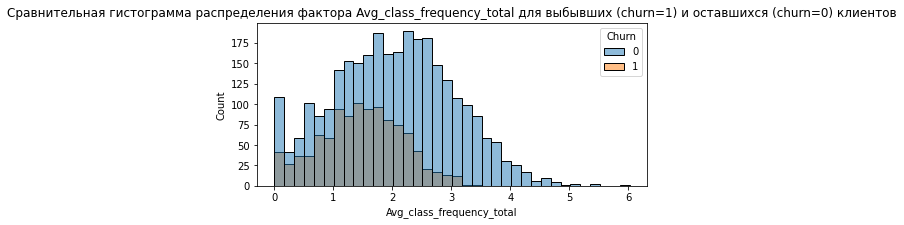

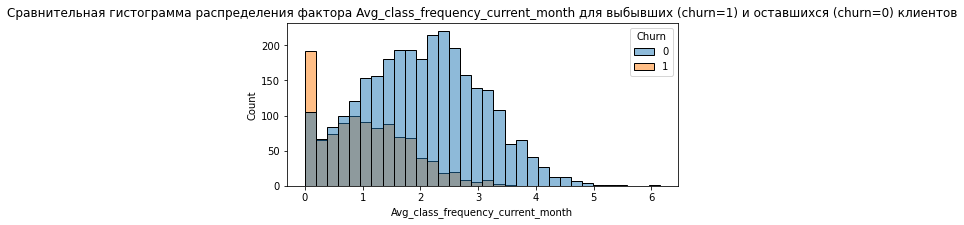

In [49]:
for i in df.drop('Churn', axis = 1).columns:
    hist_show(df, i)

<div class="alert alert-info">
    Доли мужчин и женщин среди оставшихся и выбывших клиентов практически одинаковы. Среди удаленно проживающих клиентов 
доля выбывших (порядка 80 %) существенно выше, чем среди сохраненных, где близкоживущие клиенты составляют порядка 70 %.
Среди независимых клиентов доли оставшихся и выбывших одинаковы, а среди клиентов из партнерских организаций доля выбывших 
не превышает 20 %. Аналогичная ситуация с клиентами, которые воспользовались промокодом - среди них доля выбывших составляет 
менее 20 %, в то время, как среди клиентов, не имеющих промокода, доли выбывших и сохраненных примерно равны. Зависимость 
между долей выбывших клиентов и длительностью их абонемента носит обратнопропорциональный характер: среди клиентов с годовым
абонементом доля выбывших пренебрежимо мала, среди клиентов с 6 месячным абонементом доля выбавших уже приближается к 10 %,
а вот среди клиентов с месячным обонементом выбывшие уже преобладают и составляют около 80 %. Среди клиентов, посещающих
групповые занятия доля выбывших не превышает 20 %, в то время, как доли выбывших и сохраненных среди клиентов, не посещающих,
такие занятия, примерно равны. Возрастные характеристики выбывших и оставшихся клиентов имеют нормальное распределение, однако,
средний возраст выбывших клиентов немного ниже (27 - 28), по сравнению со средним возрастом оставшихся (30 - 31). Распределение 
затрат на дополнительные услуги центра для выбывших и оставшихся клиентов примерно одинаковы - большая часть клиентов тратит до 
200 руб и мало кто тратит более 300 руб. Однако, среди выбывших практически отсутствовали клиенты, тратившие более 300 руб, 
а среди оставшихся довольно много клиентов (около 10 %) имели траты в интервале 300 - 400 руб, а совсем малая часть (1 - 2 %) 
тратили от 400 до 500 руб. Среди клиентов, до конца действия абонемента которых остается не более месяца, доля выбывших 
составляет порядка 80 %, однако, если до конца абонемента более 10 месяцев, то такие клиенты практически уже не отваливаются. 
Есть только не более 10 % клиентов, выбывших при остаточном сроке абонемента 6 мес, а выбывших среди клиентов со сроком 
абонемента 12 мес практически нет. Распределения времени жизни выбывших и оставшихся клиентов близки к распределению Пуассона. 
Максимальное количество сохраненных клиентов имеет время жизни от 1 до 5 мес, а для выбывших клиентов - 1 - 2 месяца. При этом,
выбывшие клиенты практически не живут более 4 - 5 мес, в то время, как 40 - 45 % сохраненных клиентов живут от 5 до 15 мес, а
некоторые (1 - 2 %) имеют lifetime от 15 до 30 мес. Распределения количество еженедельного посещения фитнеса для выбывших и 
сохраненных клиентов близки к нормальному виду (только у оставшихся клиентов есть выбросы при 0 числе посещений, 
соответствующие клиентам, не посещающим зал, но оплачивающим свое членство). Большинство сохраненных клиентов посещают зал 
2 - 3 раза в неделю и порядка 20 % из них посещают зал 3 и более раз в неделю. Большинство выбывших клиентов посещают зал 
1 - 2 раза в неделю, и практически не посещают зал более 3 раз в неделю. Для выбывших клиентов заметно снижение частоты 
посещений зала в месяц, предшевствующий их прекращению членства в центре, - большинство клиентов перед уходом посещали зал
от 0 до 1 раза в месяц, и лишь около 10 % из них ходили на фитнес 2 - 3 раза в месяц. 
</div>

<div class="alert alert-info">
  <b> Построение матрицы корреляции признаков </b>
    <a id="set3"></a> 
</div>

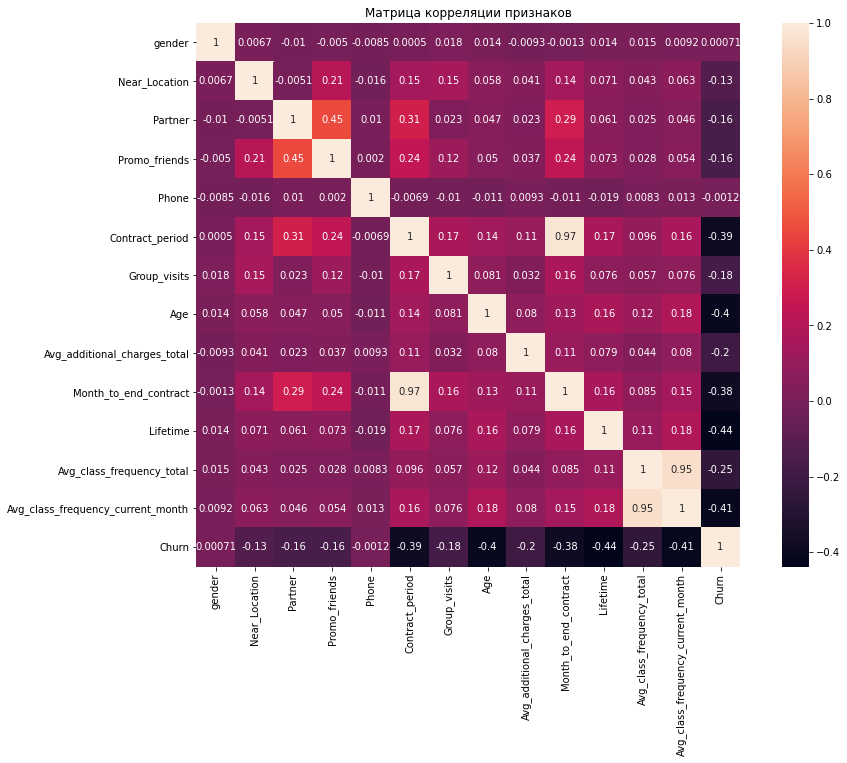

In [50]:
c = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(c, annot = True, square = True)
plt.title('Матрица корреляции признаков');

<div class="alert alert-info">
   Матрица корреляции полезна для определения степени взаимной корреляции числовых небинарных признаков. Из всех 
рассматриваемых признаков наибольшая взаимная корреляция, требующая регулятизации, наблюдается между среднемесячным числом 
посещения зала за весь период и числом посещений в последний месяц (коэф корр = 0,95), а также между длительностью абонемента
и числом месяцев до истечения абонемента (коэф корр = 0,97). Более менее значительная корреляция есть также между призанками
использования промокода и принадлежности к партнерам (коэф корр = 0,45), но она не представляет опасности мультиколлинеарности. 
</div>

<div class="alert alert-info">
  <b> Построение модели классификации для прогноза оттока клиентов </b>
    <a id="set4"></a> 
</div>

In [51]:
y = df['Churn']
X = df.drop(['Churn'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [52]:
models = [
    [LogisticRegression(solver = 'liblinear', random_state = 0), 'Логистическая регрессия'],
    [RandomForestClassifier(n_estimators = 100, random_state = 0), 'Случайный лес']
]

In [53]:
def metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [54]:
def prediction(mod, X_train, y_train, X_test, y_test, name):
    model = mod
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    metrics(y_test, y_pred, y_prob, name)

In [55]:
for i in models:
    prediction(i[0],X_train_st,y_train,X_test_st,y_test,i[1])

Логистическая регрессия
	Accuracy: 0.93
	Precision: 0.87
	Recall: 0.87
	F1: 0.87
	ROC_AUC: 0.98
Случайный лес
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.82
	F1: 0.84
	ROC_AUC: 0.97


<div class="alert alert-info">
   При сравнении прогностической способности классифицирующих моделей можно сказать, что модель Случайный лес (СЛ) (с числом 
деревьев 100) чуть хуже по параметрам Acciracy (0.92 против 0,93 у Логистич регрессии (ЛР)), Recall (0.83 против 0,86 у ЛС) и
F1 (0,85 против 0,86 у ЛС). В общем, обе модели дают практически идентичные результаты, а интегрирующий показатель AUC у них 
одинаковый (0,98). Если же модели СЛ задать только 1 дерево, то она уже будет заметно проигрывать ЛР: величина AUC такой модели
СЛ (n_estimators = 1) будет всего лишь 0,83, Accuracy 0,86 (против 0,93 у ЛР), Precision 0,71 (против 0,86 у ЛР), а Recall 0,78
против 0,86 у ЛР).
</div>

<div class="alert alert-info">
  <b> Построение модели иерархической кластеризации признаков </b>
    <a id="set5"></a> 
</div>

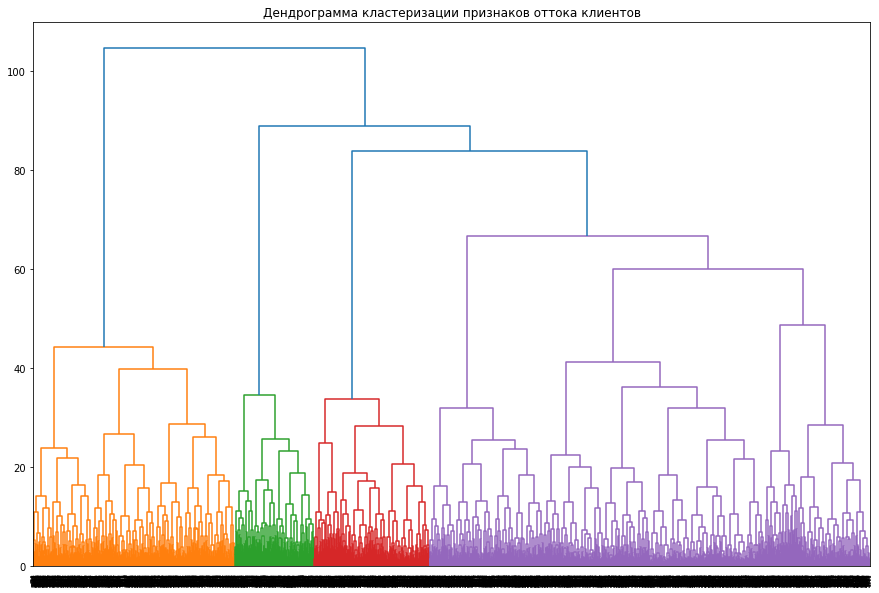

In [56]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма кластеризации признаков оттока клиентов')
plt.show() 

<div class="alert alert-info">
   Методом иерархической кластеризации можног выделяется 4 основных агломерата, удаленных друг от друга различные расстояния. 
Оранжевый аглмерат удален от сводного центра остальных агломератов на более, чем 100 ед. Зеленый удален от сводного центра 
остальных 2 аглмератов (красного и фиолетового) на 90 ед. Расстояние между сводными центрами красного и фиолетового аглмератов
составляет чуть более 80 ед. В свою очередь, оранжевый агломерат делится на 3 крупных кластера, расстояния между которыми 
лежат в интервале 40 - 45 ед. Самый маленький зеленый аглмерат разделяется на несколько мелких подкластеров, расстояние между
которыми составляет 25 - 35 ед. Красный агломерат делится на 3 различимых кластера с межкластерным расстоянием 30 - 35 ед. Самый
крупный фиолетовый агломерат делится на 3 хорошо различимых кластера, расстояния между которыми 60 - 65 ед, причем каждый из 
этих фиолетовых кластеров делится на 3 - 5 более мелких подкластера с расстояниями от 25 до 50 ед. 
</div>

<div class="alert alert-info">
  <b> Построение модели кластеризации признаков KMeans </b>
    <a id="set6"></a> 
</div>

In [57]:
mod_clusters = KMeans(n_clusters=5, random_state=0)
m_clusters = mod_clusters.fit_predict(X_st)
X['cluster'] = m_clusters
X_mean = X.groupby('cluster', as_index = False).agg('mean')

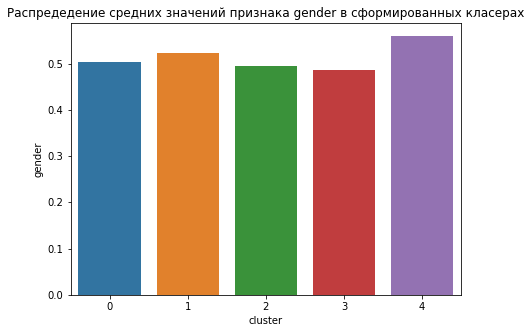

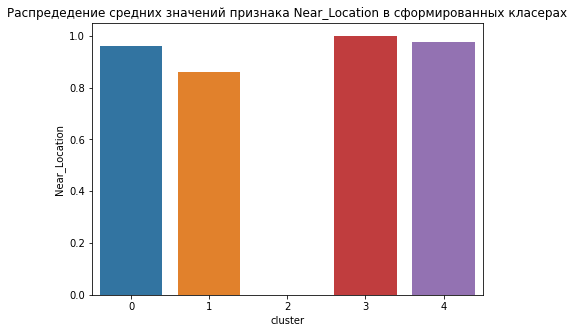

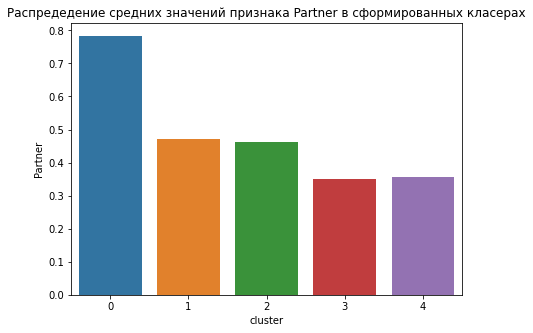

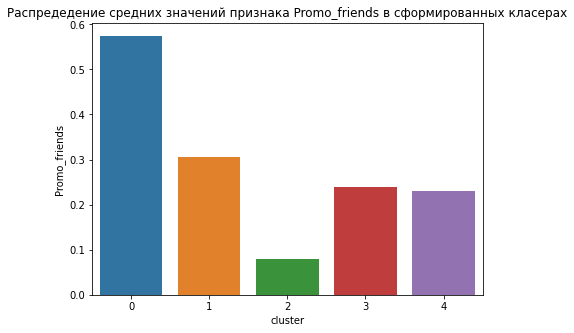

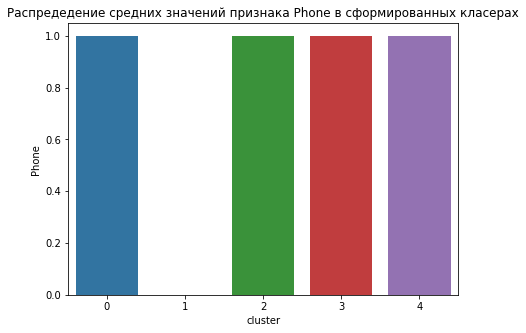

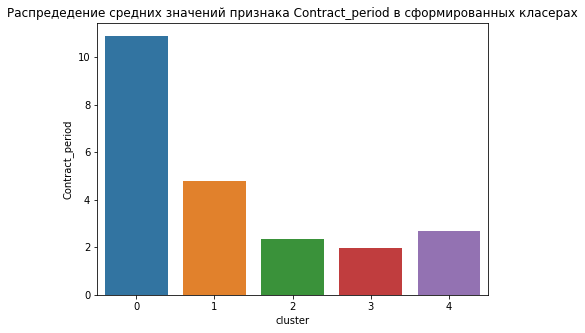

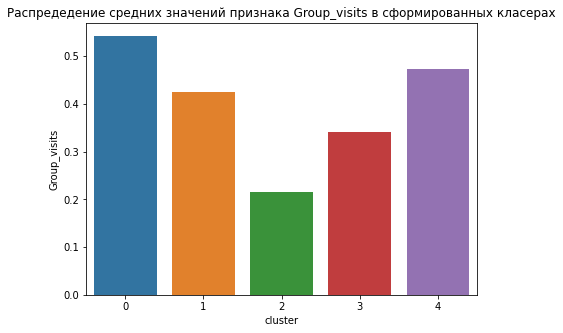

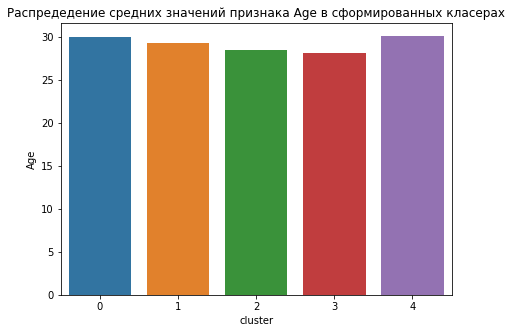

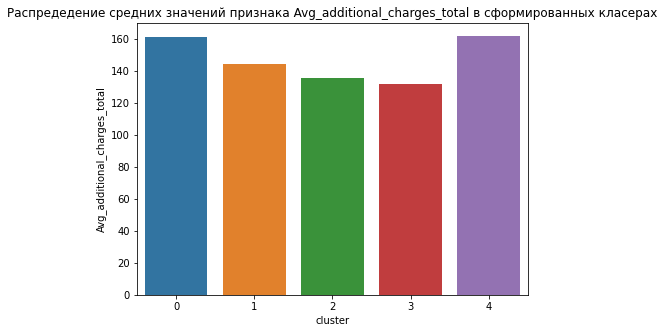

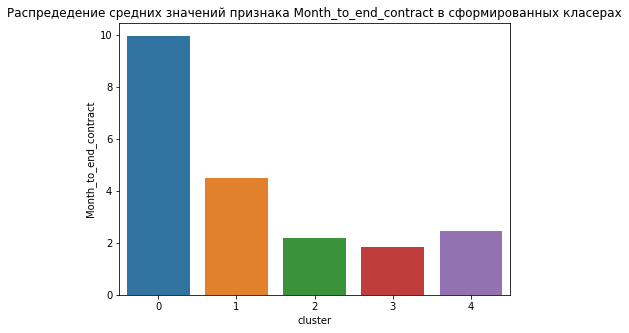

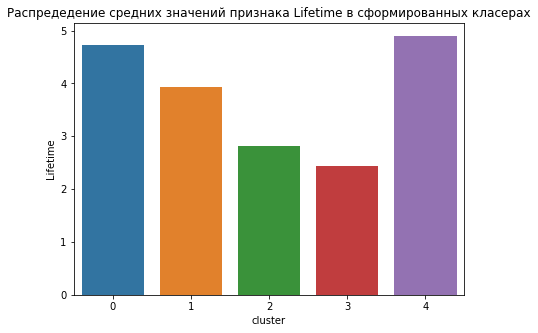

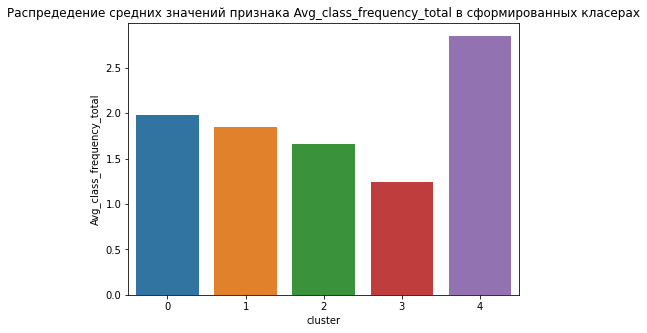

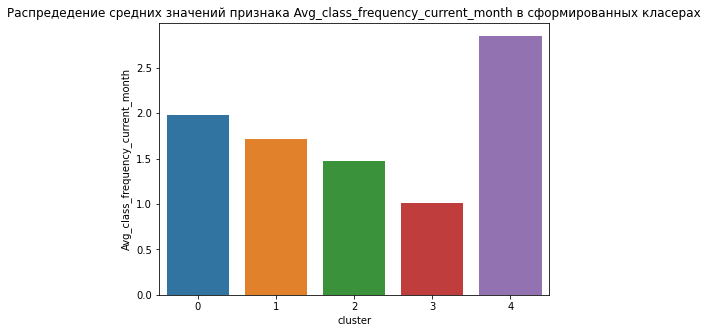

In [58]:
for i in X_mean.drop('cluster', axis = 1).columns:
    plt.figure(figsize=(7, 5))
    sns.barplot(x = 'cluster', y = i, data = X_mean)
    plt.title('Распредедение средних значений признака {} в сформированных класерах'.format(i))
    plt.show()

<div class="alert alert-info">
   На основании диаграмм распределения средних значений признаков по кластерам можно сделать следующие выводы, касающиеся 
различий кластеров. Признак gender: кластер 4 характеризуется небольшим преобладанием мужчин, тогда как другие кластеры 
содержат равные доли обоих полов. Признак Near_location: кластер 1 содержит клиентов, которые живут в относительно более 
удаленных локациях, чем клиенты в остальных кластерах. Признак Patner: Клиенты из кластера 0 четко выделяются партнерскими
отношениями (около 0,8). Намного меньше партнеров в кластерах 1 и 2 (0,45) и меньше всего партнеров в кластерах 3 и 4 (0,35).
Признак Promo_friends: кластер 0 аккумулирует большинство клиентов с промо-кодом (около 0,6). Можно выделить кластер 2, который
содержит меньше всего клиентов с промо-кодом (около 0,1). Остальные кластеры 1, 3 и 4 содержат близкие доли промо-клиентов 
(0,25 - 0,3). Признак Phone: кластер 1 вообще не содержит клиентов с телефоном, а в других кластерах у всех телефоны есть. 
Признак Contract_period: кластер 0 аккумулирует клиентов с длительными абонементами (11 мес), кластер 1 содержит много 
клиентов со средним сроком абонементов (5 мес), а остальные кластеры содержат большинство краткосрочных клиентов (около 2 мес).
Признак Group_visits: кластеры 0 и 4 содержат около 50 % клиентов, посещающих групповые занятия, кластеры 1 и 3 включают 
меньшинство групповых клиентов (35 - 40 %), а кластер 2 содержит меньше всего групповых клиентов - около 20 %. Признак Age:
не позволяет различить кластеры - во всех кластерах средний возраст около 30 лет. Признак Avg_additional_charges_total: 
клиенты кластеров 0 и 4, в среднем, тратят на доп услуги больше (около 160), чем клиенты остальных кластеров (120 - 140). Признак
Month_to_end_contract: кластер 0 включает клиентов с наибольшим остаточным сроком абонемента (более 10 мес), в кластере 1
большинство клиентов со средними остаточными сроками абонемента (4 мес), а в кластерах 2,3,4 большинство клиентов с малыми
остаточными сроками абонементов (около 2 мес). Признак Lifetime: наибольшая доля долгоживущих клиентов в 0 и 4 кластерах (около
4,5 мес), в кластере 1 доля долгожителей немного меньше (4 мес.), в кластерах 2 и 3 доля долгоживущих клиентов минимальна 
(2,5 - 3 мес). Признаки Avg_class_frequency_total и Avg_class_frequency_current_month: чаще всего фитнес посещают клиенты 
в кластере 4 (около 3 раз в неделю), затем идут клиенты из кластеров 0, 1 и 2 (1,5 - 2 раза) и на третьем месте - клиенты из 
кластера 3 (около 1 раза). 
</div>

<div class="alert alert-info">
  <b> Сравнительные гистограммы распределения признаков в различных кластерах KMeans </b>
    <a id="set7"></a> 
</div>

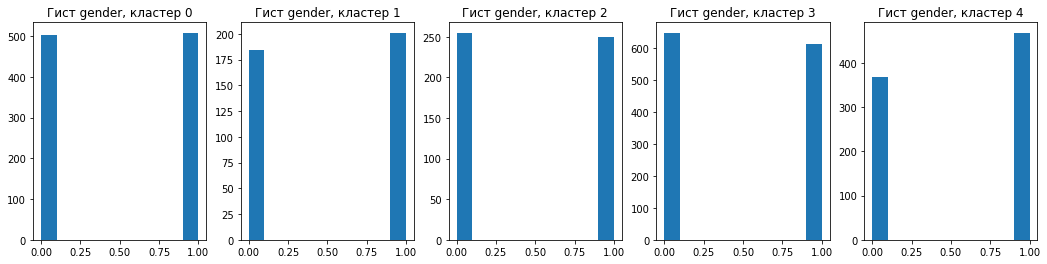

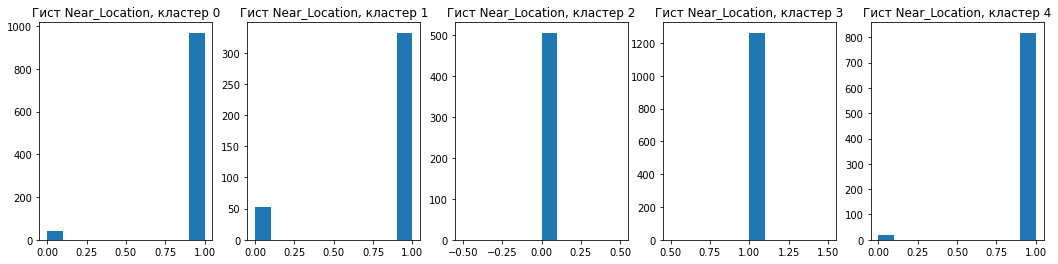

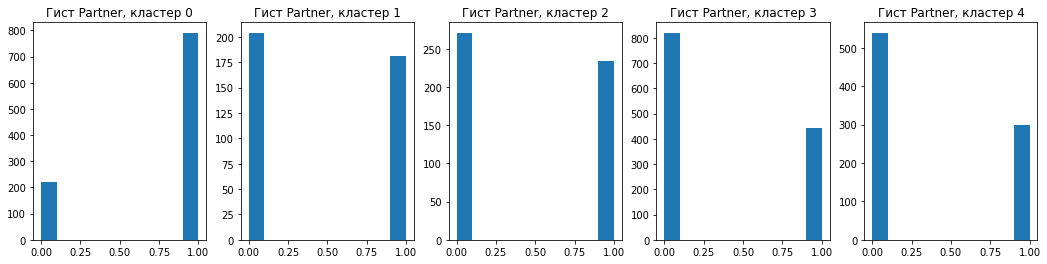

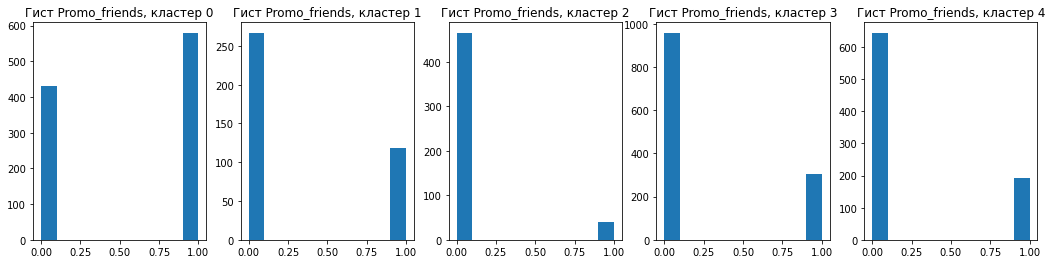

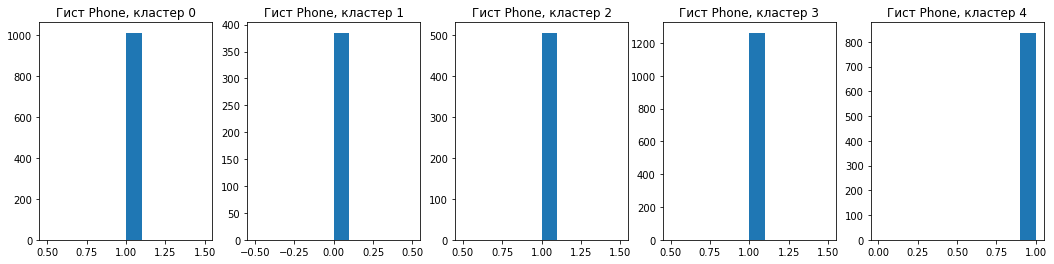

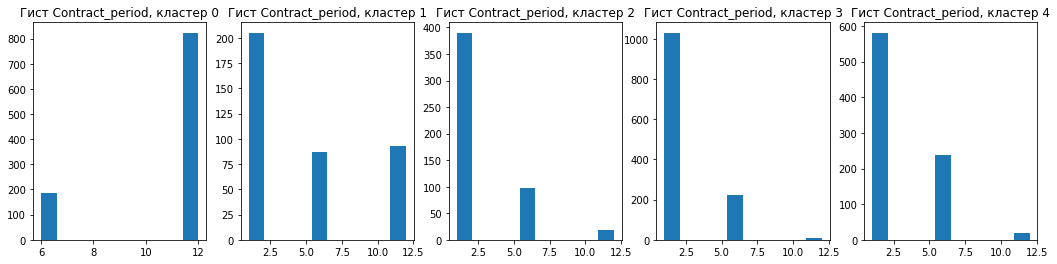

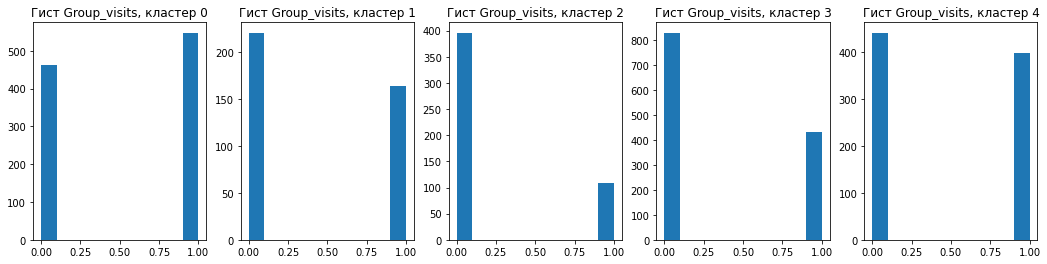

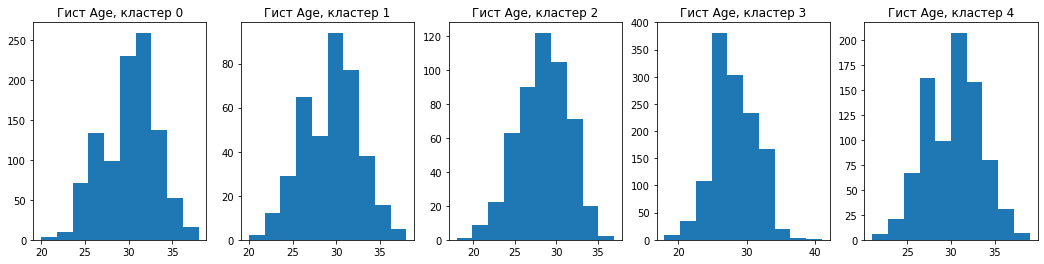

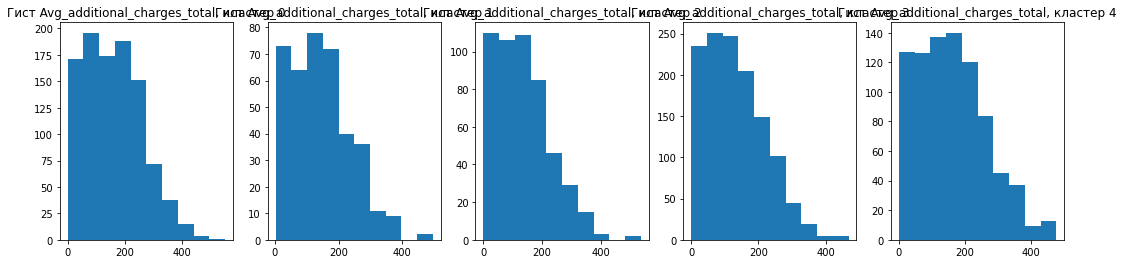

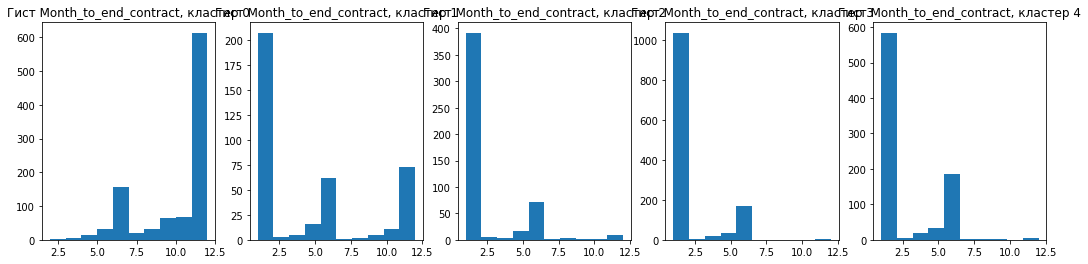

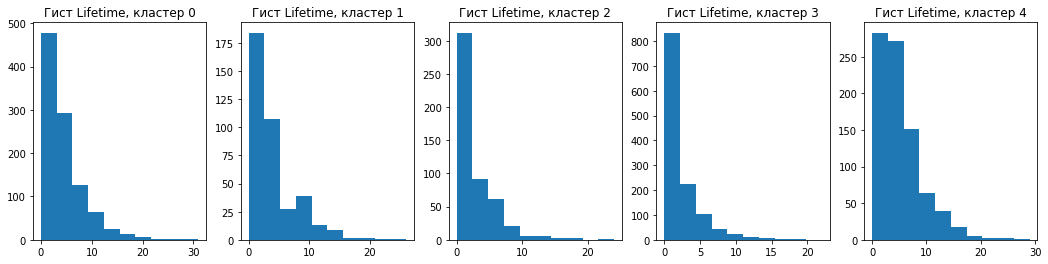

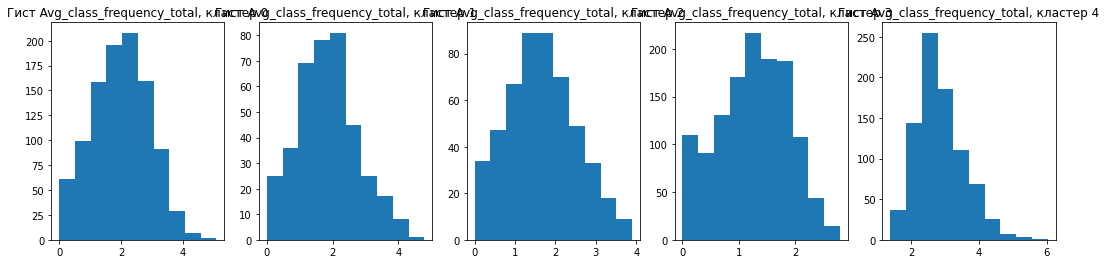

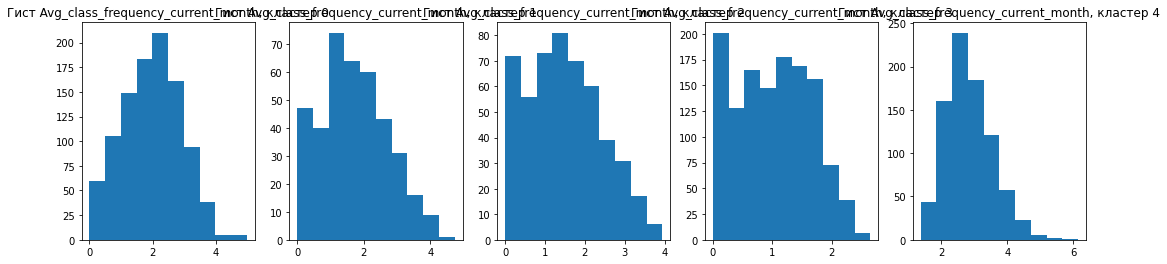

In [59]:
for i in X.drop('cluster', axis = 1).columns:
    fig, axs = plt.subplots(1,5,figsize=(18,4))
    X0 = X.query('cluster == 0')
    axs[0].hist(X0[i])
    axs[0].set_title('Гист {}, кластер 0'.format(i))
    X1 = X.query('cluster == 1')
    axs[1].hist(X1[i])
    axs[1].set_title('Гист {}, кластер 1'.format(i))
    X2 = X.query('cluster == 2')
    axs[2].hist(X2[i])
    axs[2].set_title('Гист {}, кластер 2'.format(i))
    X3 = X.query('cluster == 3')
    axs[3].hist(X3[i])
    axs[3].set_title('Гист {}, кластер 3'.format(i))
    X4 = X.query('cluster == 4')
    axs[4].hist(X4[i])
    axs[4].set_title('Гист {}, кластер 4'.format(i))



<div class="alert alert-info">
  Гистограммы распределения признаков в кластерах KMeans перестроены с использованием seaborn
</div>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

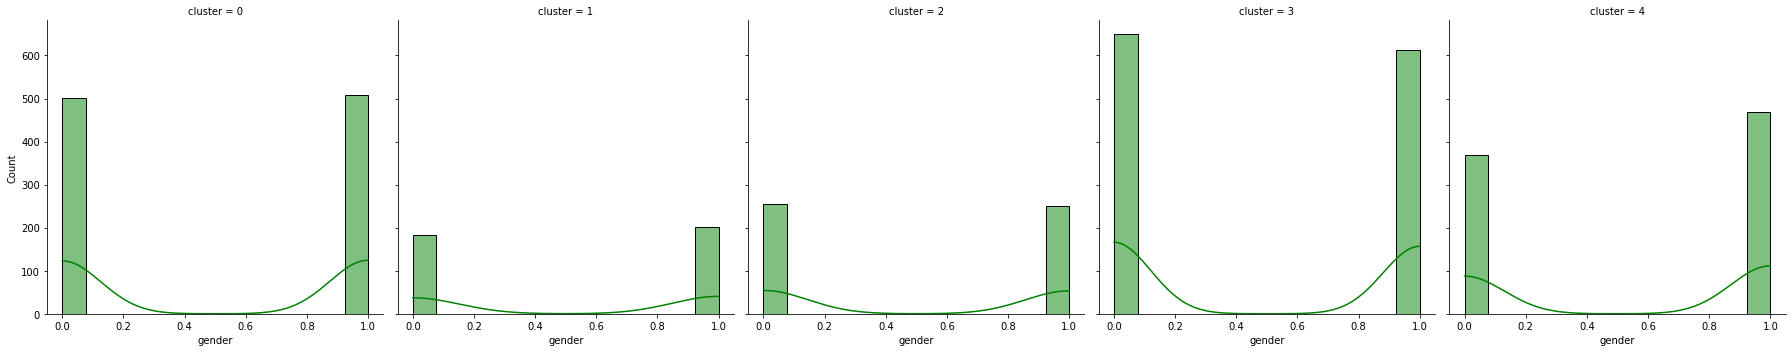

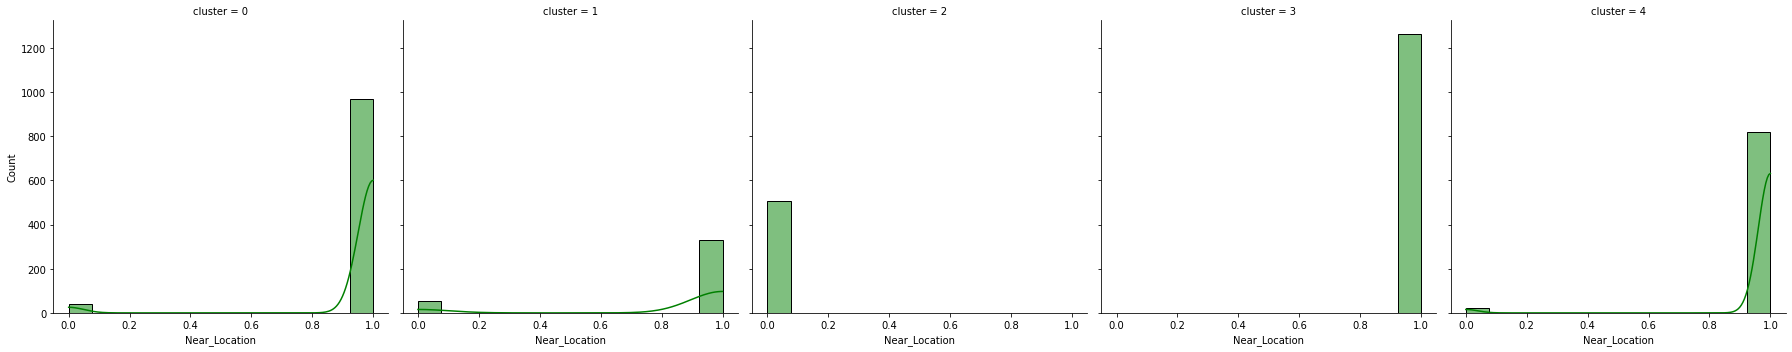

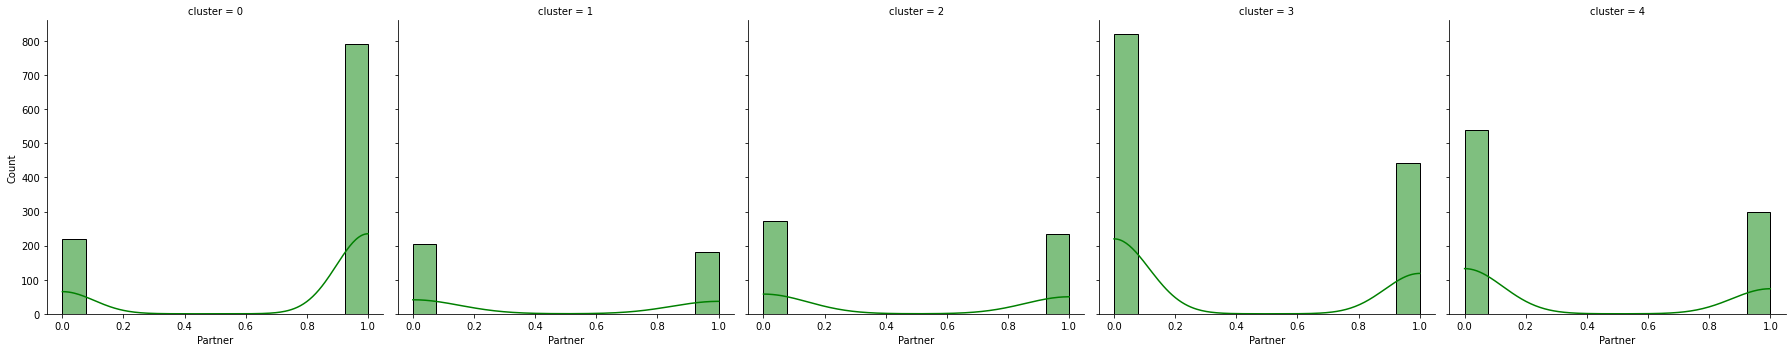

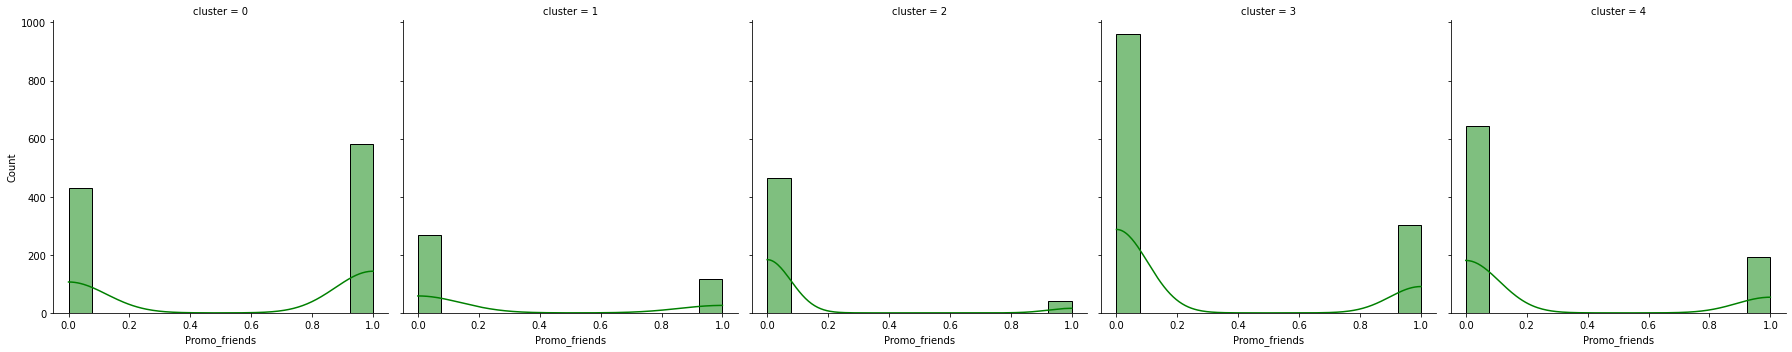

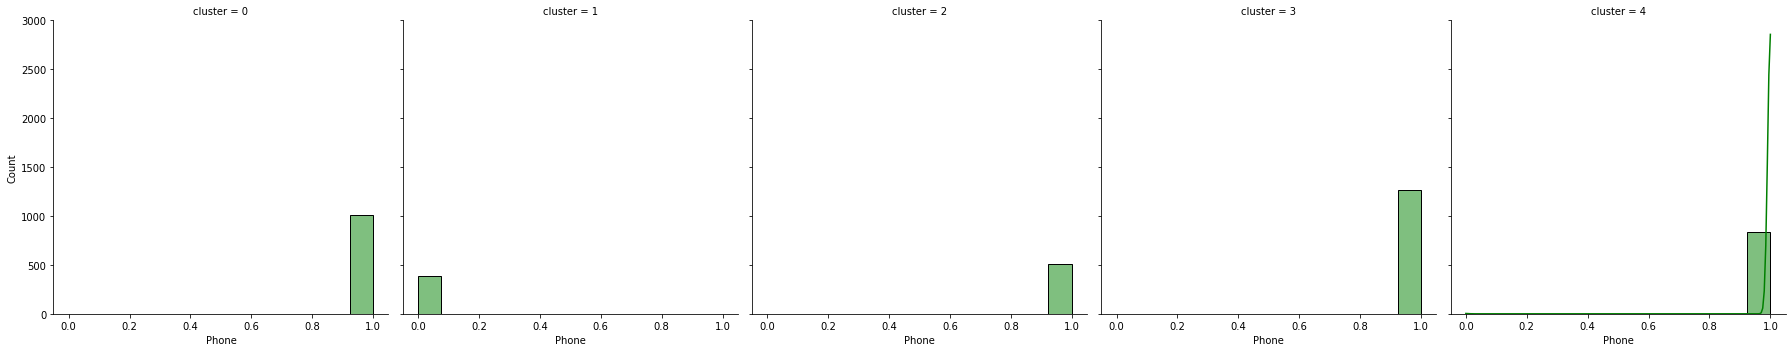

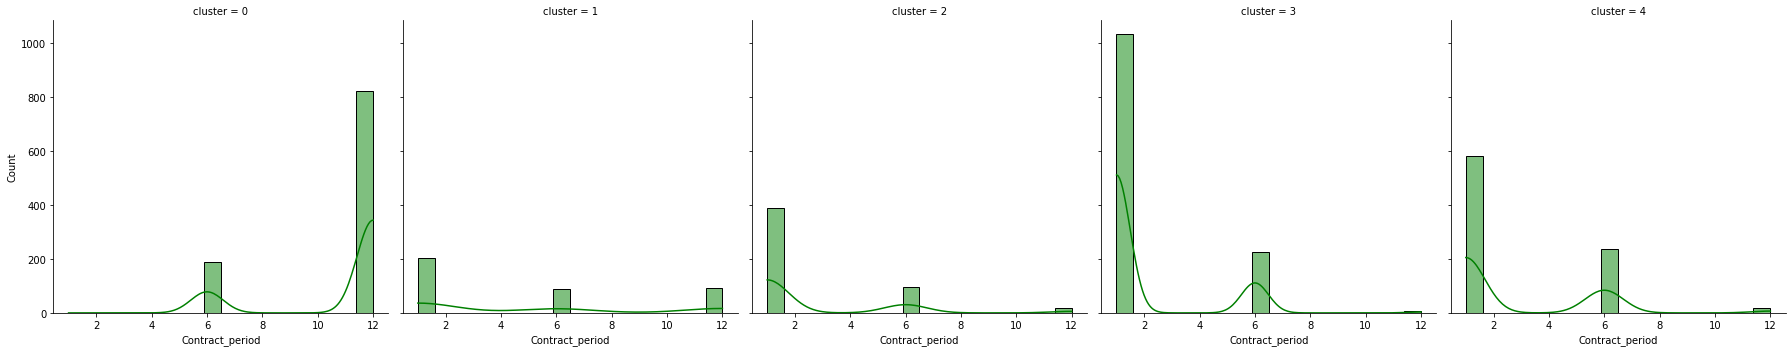

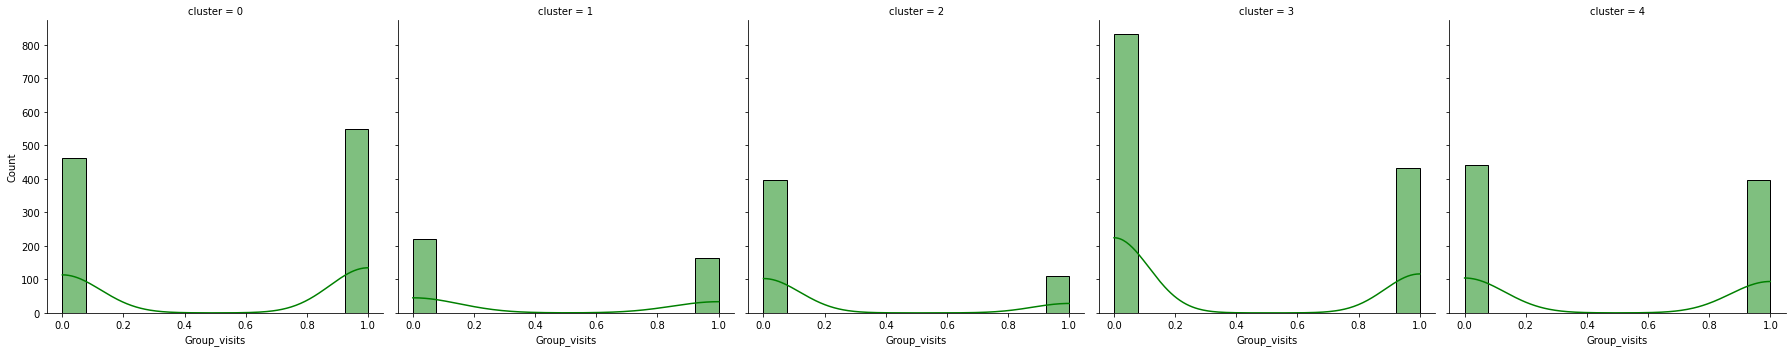

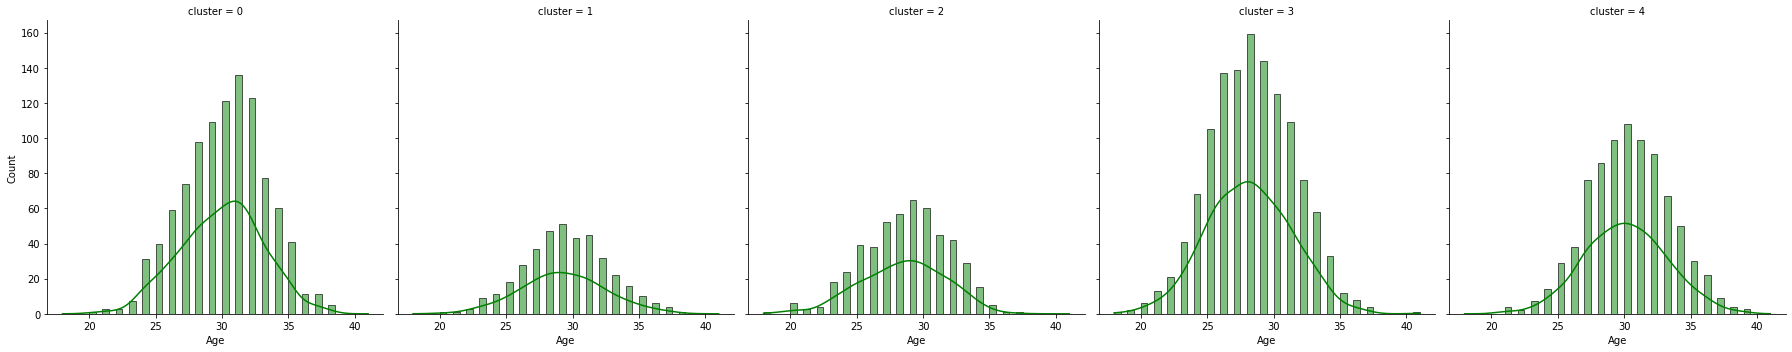

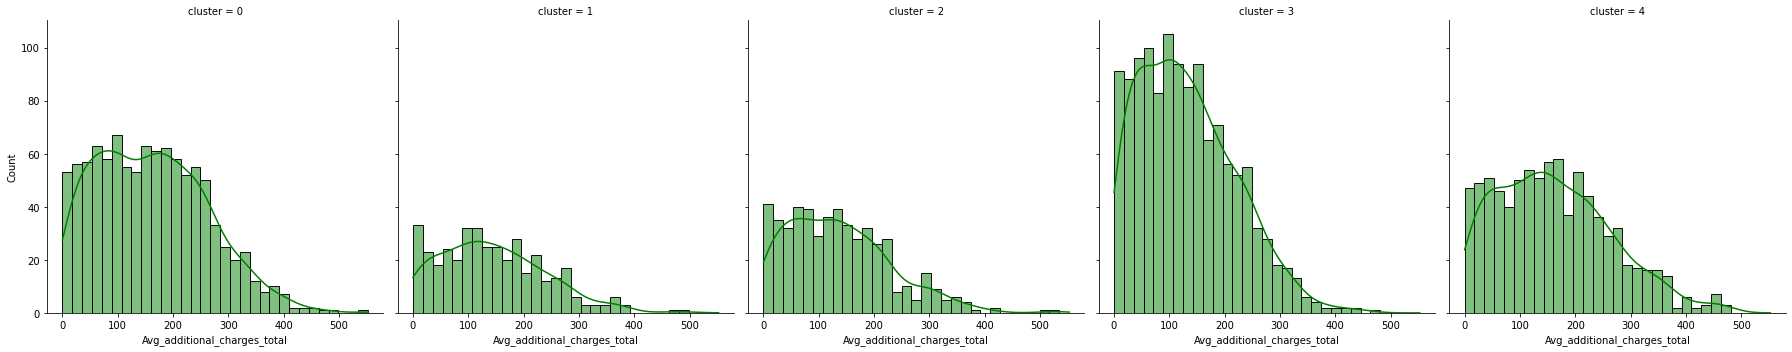

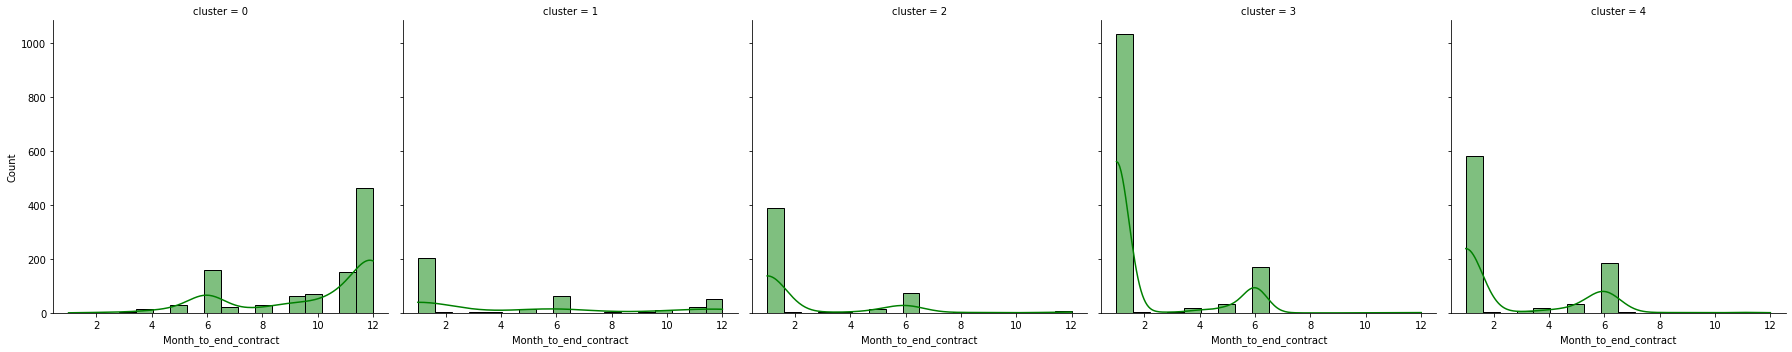

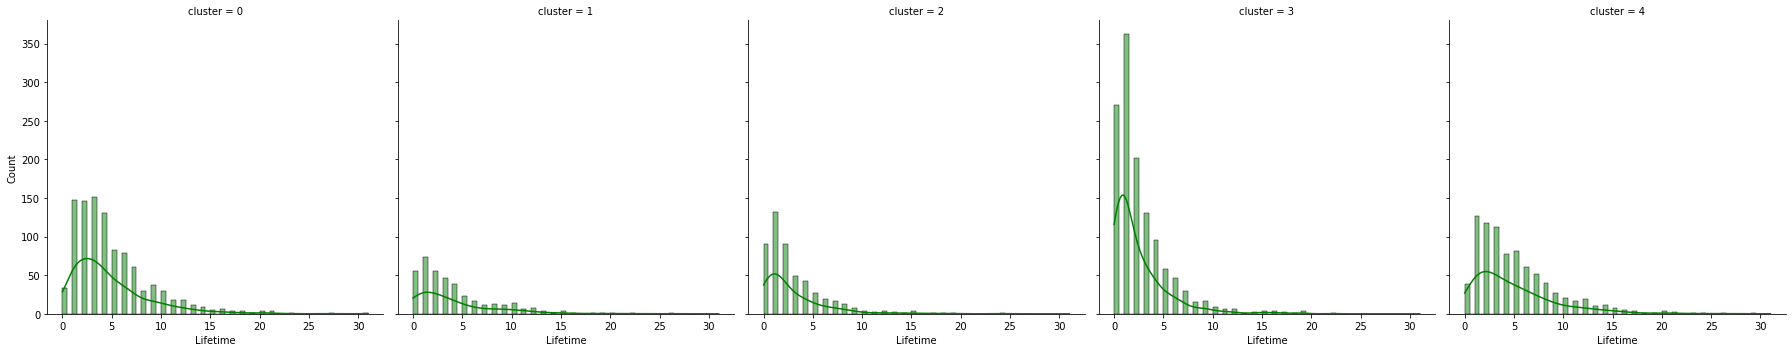

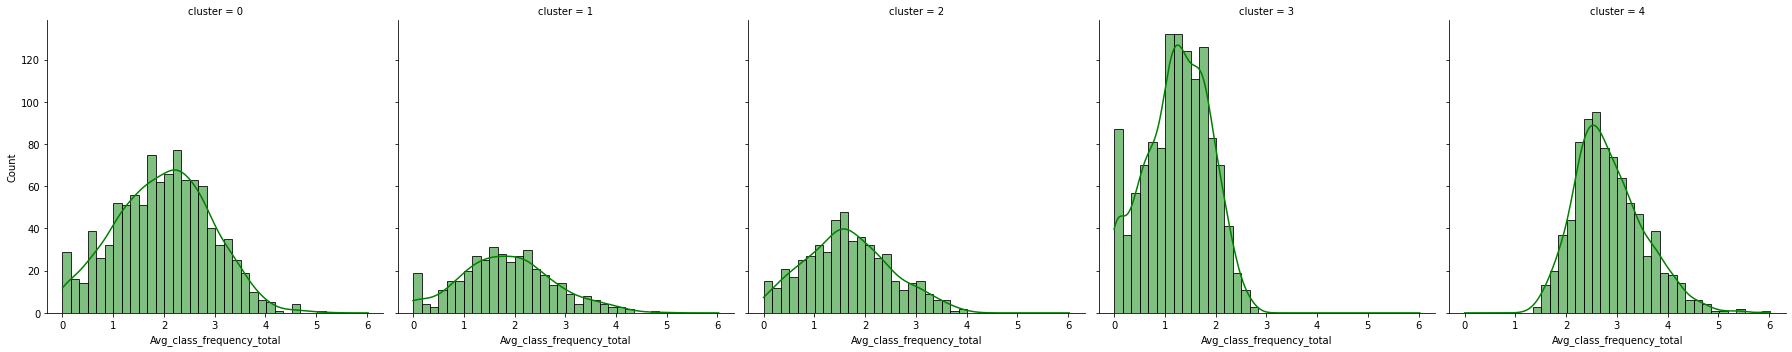

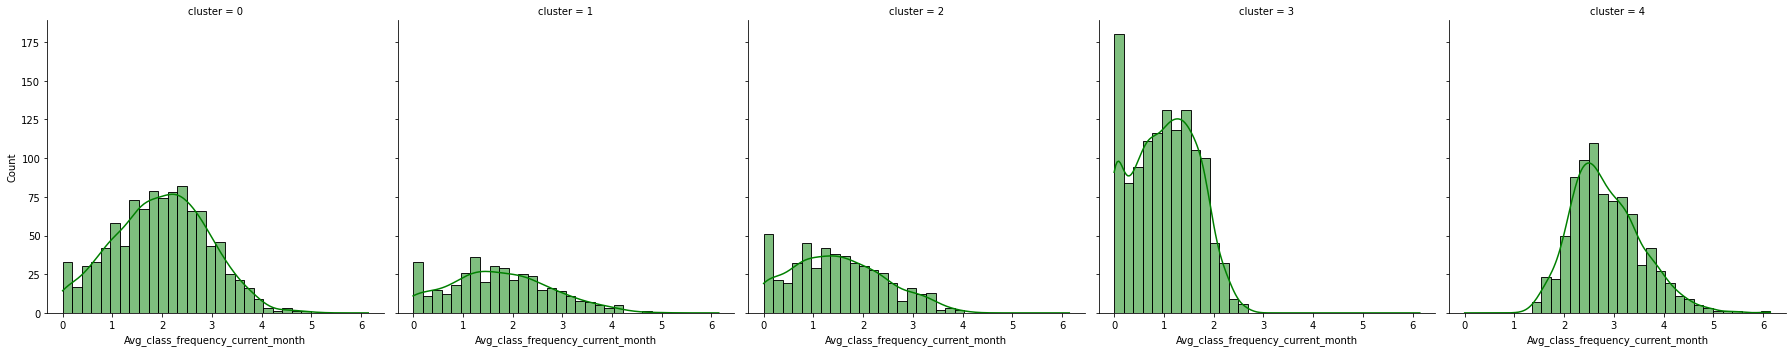

In [60]:
for i in X.drop('cluster', axis = 1).columns:
    sns.displot(data=X, x=i, col='cluster', col_wrap=5, kde=True, color='green');

<div class="alert alert-info">
   Признак Gender: во всех клапстерах, кроме 4,  равное число мужчин и женщин, в кластере 4 мужчин на 15 % больше. Признак
Near_location: в кластерах 2 и 3 вообще нет удаленно живущих клиентов, а в кластерах 0, 1 и 4 доля живущих далеко составляет 
2 - 10 %. Признак Patner: больше всего доля партнерских клиентов в кластере 0 (около 80 %), а в остальных кластерах преобладают
независимые клиенты: в 1 и 2 кластерах независимых больше на 10 - 15 %, а в 3 и 4 кластерах независимых больше примерно в 2 раза.
Признак Promo: клиенты с промокодом преобладают в кластере 0 (их больше на 25 - 30 %), в остальных кластерах преобладают клиенты
без промо-кода: в 1, 3 и 4 кластерах клиентов без промо больше в 2 - 2,5 раза, а в кластере 2 клиенты с промо составляют не более
5 - 8 %. Признак Phone: все клиенты кластера 1 - без телефонов, а в остальных кластерах телефоны есть у всех. Признак 
Contract_period: у клиентов кластера 0 преобладают долгосрочные контракты (около 12 мес), а доля среднесрочных (6 мес) не 
превышает 20 %; у клиентов кластера 1 преобладают краткосрочные абонементы (менее 2,5 мес), есть также среднесрочные (6 мес) и 
долгосрочные (12 мес.), при этом доля кракосрочных примерно равна сумме среднесрочных и долгосрочных; кластеры 2, 3 и 4 похожи:
существенно преобладают краткосрочные абонементы (менее 2,5 мес) - их доля около 80 %, значительно меньше среднесрочных 
(20 - 30 %), а доля долгосрочных не превышает 5 %. Признак Group_visits: в кластере 0 доля групповых клиентов на 10 - 15 %, а в 
остальных кластерах преобладают клиенты, не посещающие групповые занятия; при этом доля групповых клиентов кластера 4 на 10 %
меньше, затем идет кластер 1 (доля групповых меньше на 20 - 25 %), далее кластер 3 (доля групповых ниже на 50 %), а наименьшую
долю групповых имеет клапстер 2 (25 - 30 %). Признапк age: во всех кластерах распределение по возрасту сходно и близко к 
нормальному. Признак Avg_additional_charges_total: все кластеры имеют близкое распределение доп платежей, когда большинство 
клиентов тратят в пределах 200. Однако, доля клиентов, тратящих от 200 до 400 несколько больше в 0 и 4 клпастерах. Признак
Month_to_end_cjntract: кластер 1 выделяется абсолютным большинством клиентов с длительным остаточным абонементов от 10 до 12 мес;
кластеры 2,3 и 4, наоборот включают клиентов, большинство из которых имеют короткий остаточный абонемент (менее 2 мес), а 
15 -20 % клиентов этих кластеров имеют среднесрочные остаточные абонементы (6 мес.); кластер 1 также содержит преобладающую
долю клиентов с краткосрочными абонементами, однако, по 25 - 30 % клиентов этого кластера имеют средние (6 мес) и длительные 
(12 мес) абонементы. Признак lifetime: все кластеры имеют близкое распределение по времени жизни клиентов - большинство живет
до 5 мес, однако, в кластере 4 доля клиентов, живущих более 5 мес, максимальна и составляет 30 - 35 %, далее идет кластер 0, где
доля клиентов, живущих более 5 мес, составляет 20 - 25 %; остальные кластеры (1,2 и 3) имеют сходную долю клиентов с lifetime
более 5 мес - порядка 10 - 15 %. Признак Avg_class_frequency_total: чаще всего ходят на фитнес клиенты кластера 4 (в средннем, 
3 раза в нед); клиенты кластеров 0, 1 и 2 в среднем посещают фитнес 2 раза в нед, причем доля клиентов в этих кластерах, 
посещающих фитнес от 2 до 4 раз составляет около 50 %; в кластере 3 клиенты в среднем посещают фитнес не более 1,5 раза в нед, 
а доля клиентов, посещающих фитнес более 2 раз - не более 5 %, также этот кластер содержит наибольшую долю клиентов (около 30 %)
посещающих фитнес менее 1 раза в нед. Аналогичным образом распределены клиенты в кластерах по признаку 
Avg_class_frequency_current. 
</div>

<div class="alert alert-info">
  <b> Сравнение доли оттока клиентов в разных кластерах </b>
    <a id="set8"></a> 
</div>

In [61]:
df['cluster'] = m_clusters

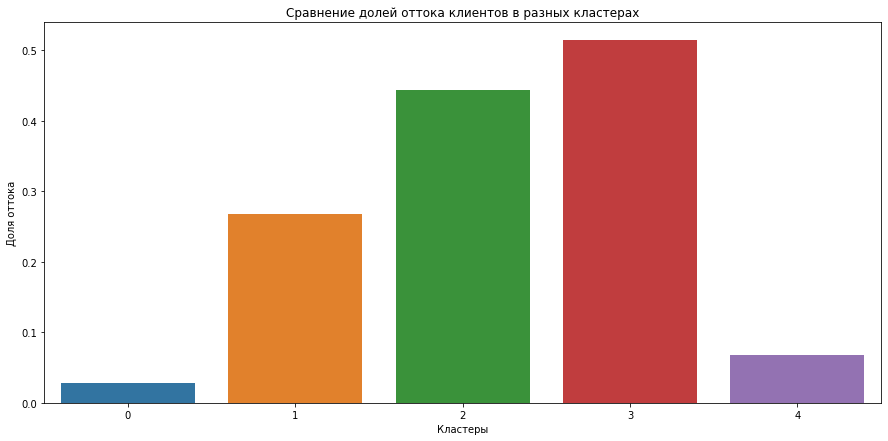

In [62]:
df_c = df.groupby('cluster', as_index = False).agg({'Churn':'mean'})
plt.figure(figsize=(15, 7))
sns.barplot(x = 'cluster', y = 'Churn', data = df_c)
plt.title('Сравнение долей оттока клиентов в разных кластерах')
plt.xlabel('Кластеры')
plt.ylabel('Доля оттока')
plt.show()

<div class="alert alert-info">
   Наименее склонны к оттоку клиенты из кластеров 0 и 4 (0,3 - 0,8). Наибольший отток наблюдается среди клиентов кластера 3 (0,5) 
и немного в меньшей степени - у клиентов кластера 2 (0,45). У клиентов кластера 1 промежуточный уровень оттока (около 0,3).
</div>

<div class="alert alert-info">
  <b> Выводы и рекомендации </b>
    <a id="set9"></a> 
</div>

<div class="alert alert-info">

  1. Кластер 0 неслучайно содержит минимум выбывших клиентов, так как характеризуется след признаками: клиенты из кластера 0 
четко выделяются партнерскими отношениями (около 0,8), а также кластер 0 аккумулирует большинство клиентов с промо-кодом 
(около 0,6). Кроме того, кластер 0 аккумулирует клиентов с длительными абонементами (11 мес), а также кластер 0 включает 
клиентов с наибольшим остаточным сроком абонемента (более 10 мес).

  2. Кластер 4 также лидирует по низкому оттоку клиентов, лишь немного уступая кластеру 0. Для клиентов этого кластера 
характерны след черты: относительно более высокое преобладание мужчин; около 50 % клиентов кластера 4 (аналогично кластеру 0)
посещают групповые занятия (что намного больше, чем в остальных кластерах); клиенты кластера 4 (аналогично клиентам кластера 0),
в среднем, больше клиентов других кластеров тратят на доп услугие (около 160); клиенты кластера 4 (наряду с клиентами кластера 0)
наиболее долгоживущие (средний lifetime 4.5 мес); клиенты кластера 4 отличаются наиболее частым посещением зала - около 3 раз в
неделю. 

  3. Кластер 3 лидирует по степени оттока клиентов, а клиенты этого кластера имеют след особенности: минимальная доля клиентов,
живущих более 5 мес (менее 10 %), а также минимальная величина среднего lifetime (2,5 - 3 мес); в кластере 3 клиенты в среднем 
посещают фитнес не более 1,5 раза в нед, а доля клиентов, посещающих фитнес более 2 раз - не более 5 %, также этот кластер
содержит наибольшую долю клиентов (около 30 %) посещающих фитнес менее 1 раза в нед.

  4. Кластер 2 также содержит большую долю отвалившихся клиентов, лишь немного уступая кластеру 3. Кластер 2 выделяется тем, что
содержит меньше всего групповых клиентов (около 20 %), а также, наряду с кластером 3, имеет наименьшее среднее время жизни 
клиентов - 2,5 - 3 мес.

  5. Кластер 1 имеет среднюю долю оттока клиентов, так как в него объедены клиенты по признаку отсутствия телефона. 
    
  6. Рекомендации для удержания клиентов: согласно результатам проведенной кластеризации, набольший эффект для снижения оттока
клиентов имеют следующие действия: развитие партнерских программ и широкое использование промо-акций; развитие количества и 
разнообразия групповых занятий; стимулирование увеличения частоты посещения зала (например, введение поощрительной системы
скидок, зависящих от частоты посещения); увеличение разнообразия предлагаемых платных доп услуг (бары здорового питания, 
массаж, консультации и пр.).
    
</div>